In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-20,332.690002,333.100006,325.040009,328.980011,328.980011,5953800
1,2017-12-21,329.589996,333.739990,327.209991,331.660004,331.660004,4385200
2,2017-12-22,329.510010,330.920013,324.820007,325.200012,325.200012,4215800
3,2017-12-26,323.829987,323.940002,316.579987,317.290009,317.290009,4378400
4,2017-12-27,316.000000,317.679993,310.750000,311.640015,311.640015,4712100


In [3]:
def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [4]:
signal = np.copy(tesla.Close.values)

In [5]:
anchor_3 = anchor(signal, 0.3)
anchor_5 = anchor(signal, 0.5)
anchor_8 = anchor(signal, 0.8)

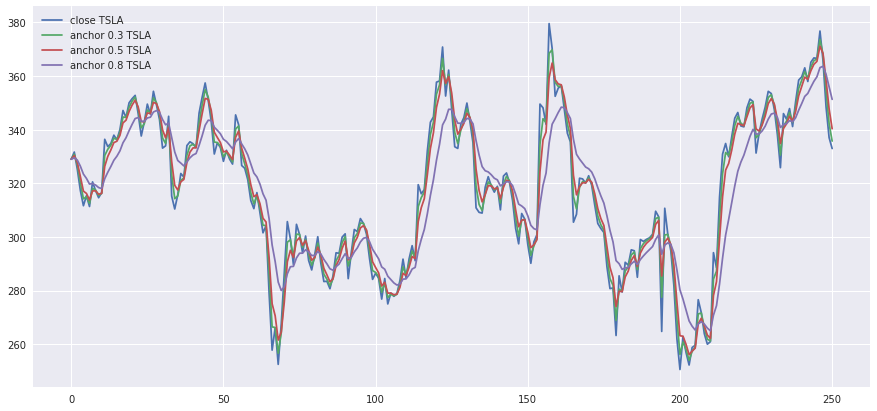

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(tesla.Close)), tesla.Close, label ='close TSLA')
plt.plot(np.arange(len(tesla.Close)), anchor_3, label = 'anchor 0.3 TSLA')
plt.plot(np.arange(len(tesla.Close)), anchor_5, label = 'anchor 0.5 TSLA')
plt.plot(np.arange(len(tesla.Close)), anchor_8, label = 'anchor 0.8 TSLA')
plt.legend()
plt.show()